# Investment Analysis
André Guerra<br>
August, 20205

In [1]:
import numpy as np
import numpy_financial as npf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization settings
TICKSFONT = 13; TITLEFONT = 15; FIGWIDTH = 6.4
FIGHEIGHT = 4.8; LINEWIDTH = 3

In [2]:
# mortgage porameters
home_price = 500_000
interest_rate = 0.045
loan_term = 30
down_payment_rate = 0.20
down_payment = down_payment_rate * home_price
loan_amount = home_price - down_payment

loan_payment = -npf.pmt(interest_rate/12, loan_term*12, loan_amount)
total_payment = loan_payment * loan_term * 12
print(f"Monthly loan payment: ${loan_payment:,.2f}")
print(f"Total payment over {loan_term} years: ${total_payment:,.2f}")
print(f"Total interest paid over {loan_term} years: ${total_payment - loan_amount:,.2f}")

Monthly loan payment: $2,026.74
Total payment over 30 years: $729,626.85
Total interest paid over 30 years: $329,626.85


In [3]:
# Investment analysis - investing monthly interest in S&P 500
sp500_annual_return = 0.10  # Historical average annual return of S&P 500 (~10%)
sp500_monthly_return = sp500_annual_return / 12

# Create amortization schedule to get monthly interest payments
payment_schedule = pd.date_range(start='2026-01-01', periods=loan_term * 12, freq='M')
monthly_interest_rate = interest_rate / 12

# Calculate monthly payment
monthly_payment = npf.pmt(rate=monthly_interest_rate, nper=loan_term * 12, pv=-loan_amount, fv=0, when='end')

# Initialize arrays for amortization calculation
last_balance = np.zeros(loan_term * 12)
new_balance = np.zeros(loan_term * 12)
monthly_interest = np.zeros(loan_term * 12)
monthly_principal = np.zeros(loan_term * 12)

# Amortization calculation
for i in range(loan_term * 12):
    if i == 0:
        last_balance[i] = loan_amount
    else:
        last_balance[i] = new_balance[i - 1]

    monthly_interest[i] = last_balance[i] * monthly_interest_rate
    monthly_principal[i] = monthly_payment - monthly_interest[i]
    new_balance[i] = last_balance[i] - monthly_principal[i]

# Calculate investment growth - investing each month's interest payment
investment_values = []
total_invested = 0
current_investment_value = 0

for month in range(loan_term * 12):
    # Add this month's interest payment to investment
    monthly_investment = monthly_interest[month]
    total_invested += monthly_investment
    
    # Grow existing investment by S&P 500 monthly return
    current_investment_value *= (1 + sp500_monthly_return)
    
    # Add new investment
    current_investment_value += monthly_investment
    
    investment_values.append(current_investment_value)

# Create DataFrame for analysis
investment_df = pd.DataFrame({
    'Payment Date': payment_schedule,
    'Monthly Interest': monthly_interest,
    'Monthly Investment': monthly_interest,  # Same as interest
    'Investment Value': investment_values,
    'Total Invested': np.cumsum(monthly_interest)
})
investment_df.set_index('Payment Date', inplace=True)
investment_df.index = investment_df.index.to_period('M')
investment_df = investment_df.round(2)

# Final results
final_investment_value = investment_values[-1]
total_interest_invested = sum(monthly_interest)
investment_gain = final_investment_value - total_interest_invested

print(f"\n{'='*60}")
print(f"INVESTMENT ANALYSIS - INVESTING MONTHLY INTEREST IN S&P 500")
print(f"{'='*60}")
print(f"S&P 500 assumed annual return: {sp500_annual_return*100:.1f}%")
print(f"Monthly payment: ${monthly_payment:,.2f}")
print(f"Total interest payments over {loan_term} years: ${total_interest_invested:,.2f}")
print(f"Final investment value: ${final_investment_value:,.2f}")
print(f"Investment gain: ${investment_gain:,.2f}")
print(f"Return on investment: {(investment_gain/total_interest_invested)*100:.1f}%")
print(f"Net effect vs paying interest: ${investment_gain:,.2f} gained")


INVESTMENT ANALYSIS - INVESTING MONTHLY INTEREST IN S&P 500
S&P 500 assumed annual return: 10.0%
Monthly payment: $2,026.74
Total interest payments over 30 years: $329,626.85
Final investment value: $2,743,801.90
Investment gain: $2,414,175.05
Return on investment: 732.4%
Net effect vs paying interest: $2,414,175.05 gained


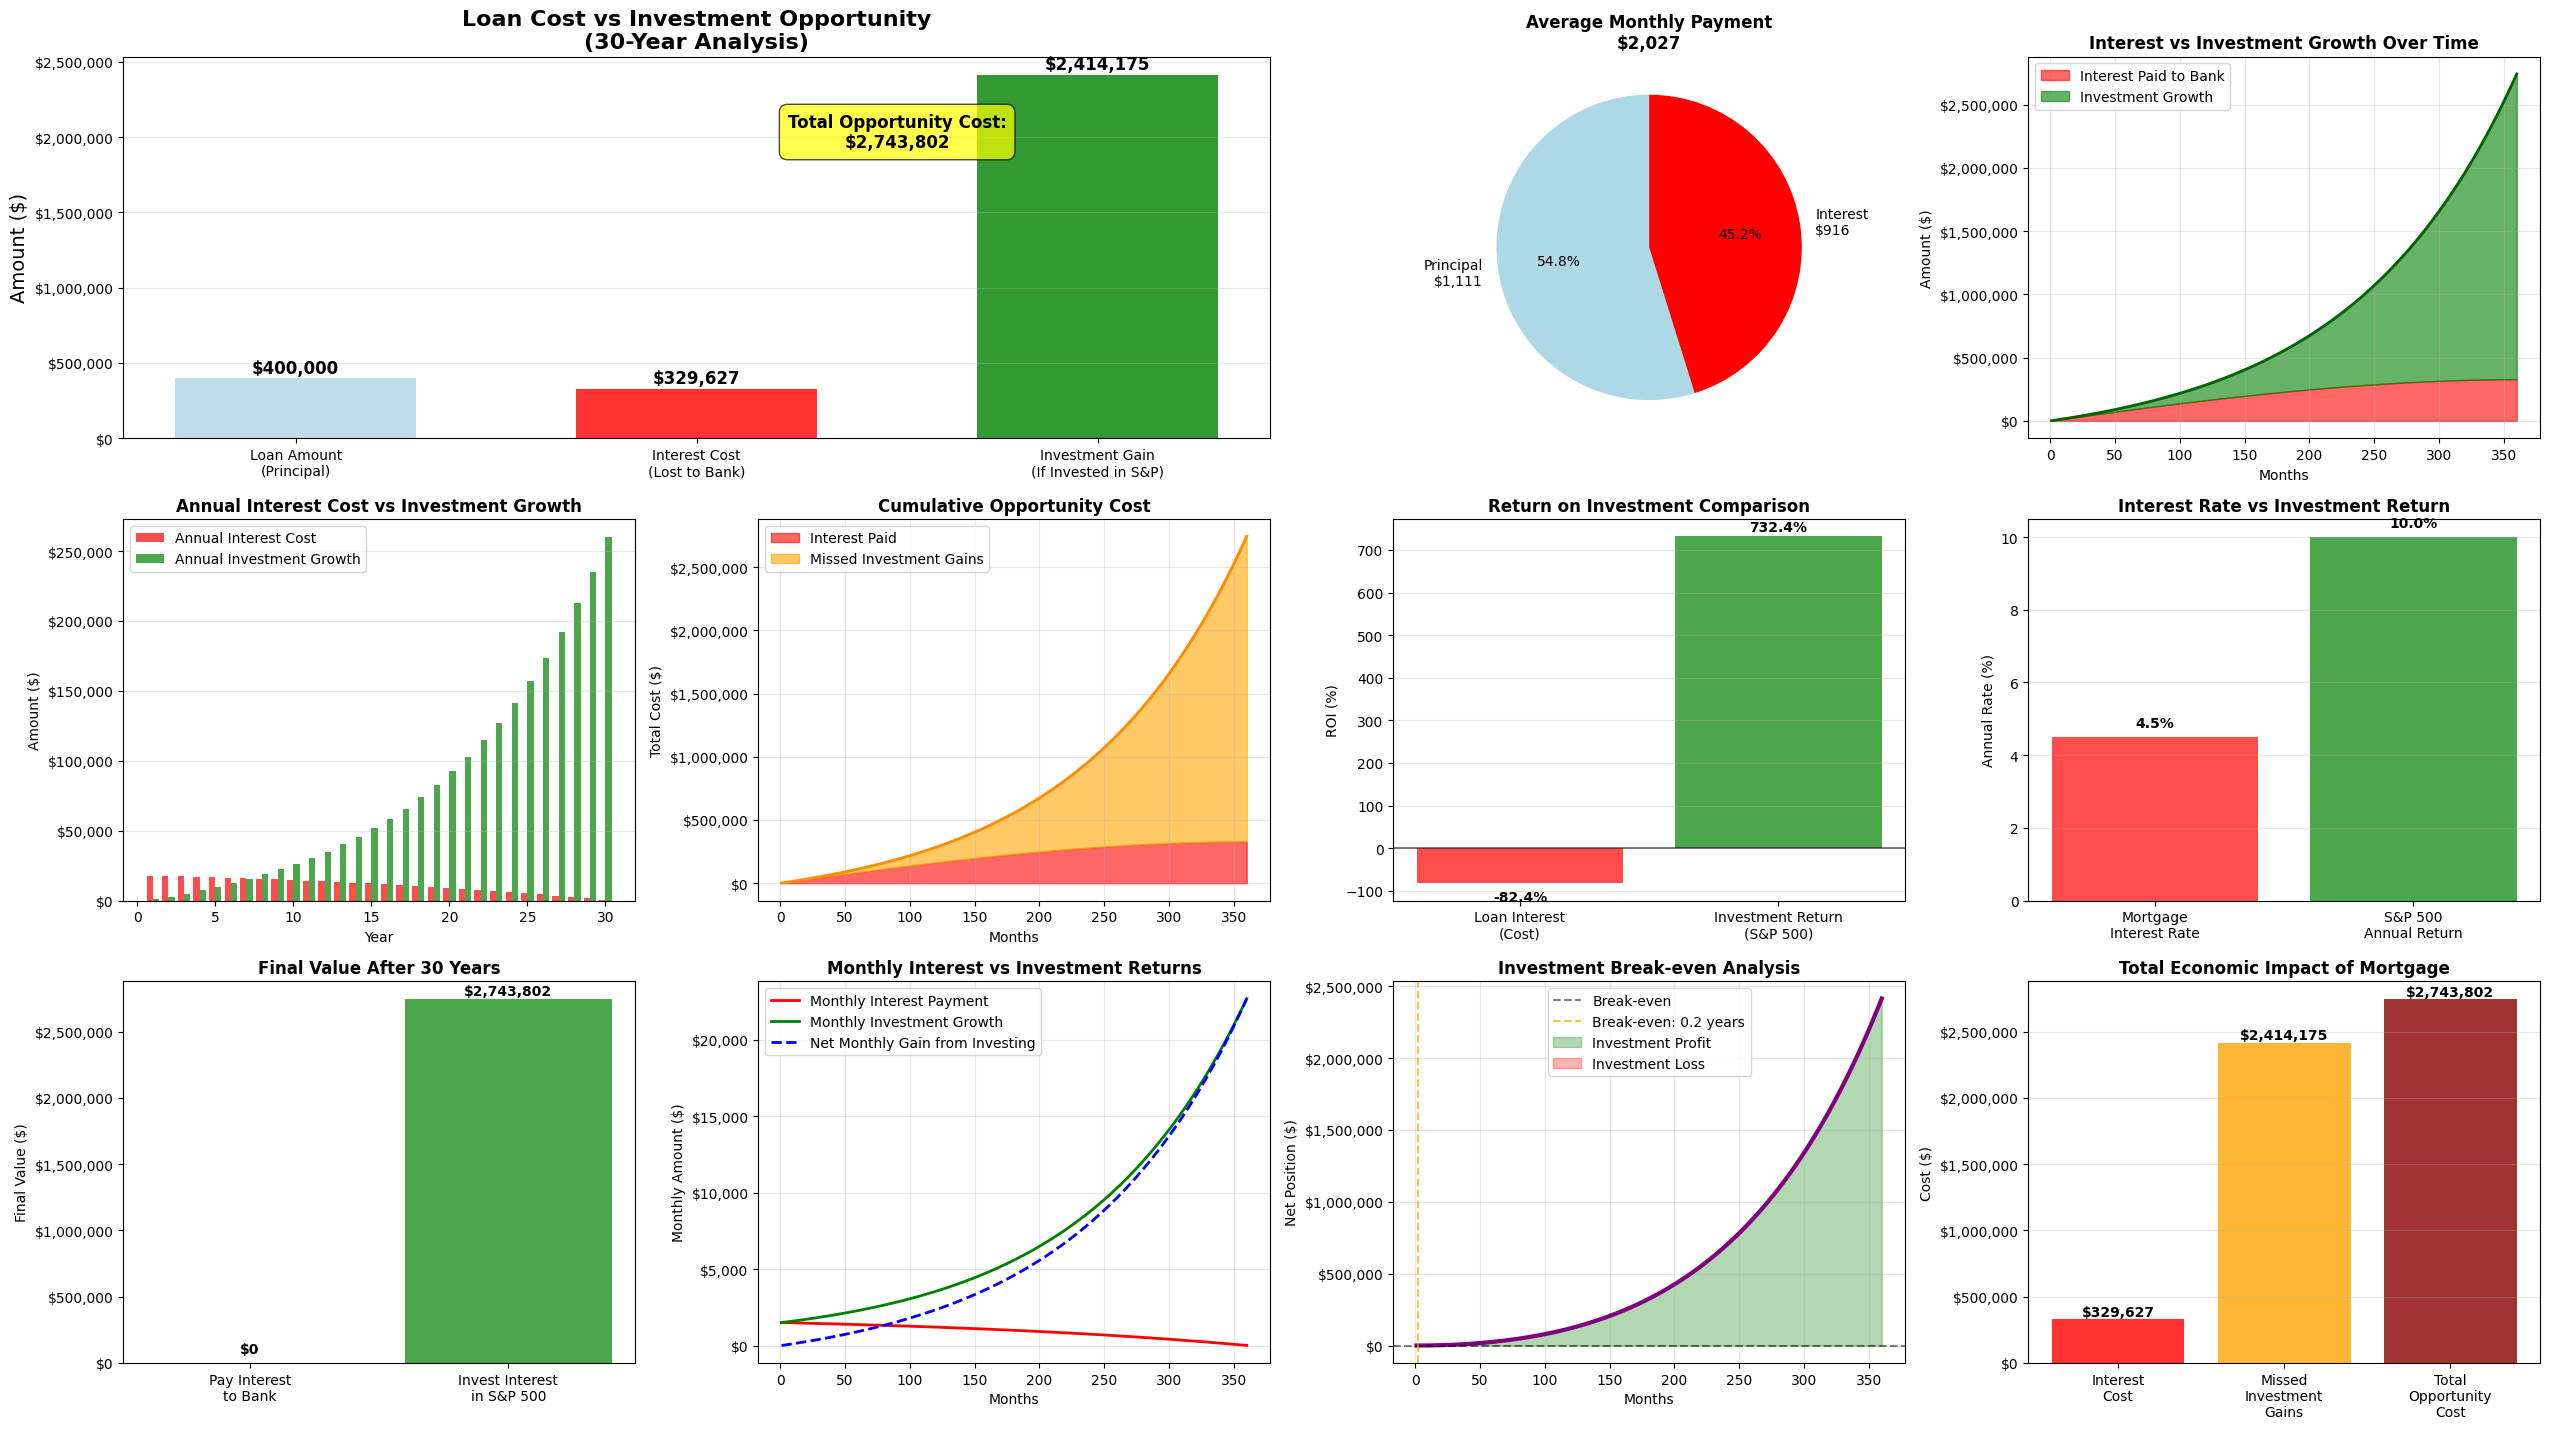


COMPREHENSIVE LOAN COST vs INVESTMENT OPPORTUNITY ANALYSIS
LOAN DETAILS:
  Home price:                    $500,000.00
  Loan amount:                   $400,000.00
  Interest rate:                 4.50%
  Loan term:                     30 years
  Monthly payment:               $2,026.74

COST ANALYSIS:
  Total interest cost:           $329,626.85
  Interest as % of loan:         82.4%

INVESTMENT OPPORTUNITY:
  S&P 500 assumed return:        10.0%
  Final investment value:        $2,743,801.90
  Investment gains:              $2,414,175.05
  Investment ROI:                732.4%

OPPORTUNITY COST:
  Interest paid to bank:         $329,626.85
  Missed investment gains:       $2,414,175.05
  Total opportunity cost:        $2,743,801.90
  Opportunity cost as % of loan: 686.0%

BREAK-EVEN ANALYSIS:
  Investment break-even:         0.2 years
  Time to recoup interest:       30 years (end of loan)


In [4]:
# Create comprehensive loan cost vs investment opportunity visualization
plt.figure(figsize=(4 * FIGWIDTH, 3 * FIGHEIGHT))

# 1. Direct Cost Comparison - Large focal chart
plt.subplot(3, 4, (1, 2))
categories = ['Loan Amount\n(Principal)', 'Interest Cost\n(Lost to Bank)', 'Investment Gain\n(If Invested in S&P)']
values = [loan_amount, total_interest_invested, investment_gain]
colors = ['lightblue', 'red', 'green']
bars = plt.bar(categories, values, color=colors, alpha=0.8, width=0.6)

# Add value labels on bars
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 10000,
             f'${value:,.0f}', ha='center', va='bottom', fontweight='bold', fontsize=12)

plt.title('Loan Cost vs Investment Opportunity\n(30-Year Analysis)', fontsize=16, fontweight='bold')
plt.ylabel('Amount ($)', fontsize=14)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${x:,.0f}'))
plt.grid(axis='y', alpha=0.3)

# Add net opportunity cost annotation
net_opportunity_cost = total_interest_invested + investment_gain
plt.annotate(f'Total Opportunity Cost:\n${net_opportunity_cost:,.0f}', 
             xy=(1.5, max(values)*0.8), xytext=(1.5, max(values)*0.8),
             bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.7),
             fontsize=12, ha='center', fontweight='bold')

# 2. Monthly Payment Breakdown
plt.subplot(3, 4, 3)
avg_monthly_interest = np.mean(monthly_interest)
avg_monthly_principal = np.mean(monthly_principal)
sizes = [avg_monthly_principal, avg_monthly_interest]
labels = [f'Principal\n${avg_monthly_principal:,.0f}', f'Interest\n${avg_monthly_interest:,.0f}']
colors = ['lightblue', 'red']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title(f'Average Monthly Payment\n${monthly_payment:,.0f}', fontweight='bold')

# 3. Investment Growth vs Interest Paid
plt.subplot(3, 4, 4)
months = range(1, len(investment_df) + 1)
plt.fill_between(months, investment_df['Total Invested'], 
                 label='Interest Paid to Bank', color='red', alpha=0.6)
plt.fill_between(months, investment_df['Investment Value'], 
                 investment_df['Total Invested'], 
                 label='Investment Growth', color='green', alpha=0.6)
plt.plot(months, investment_df['Investment Value'], color='darkgreen', linewidth=2)
plt.title('Interest vs Investment Growth Over Time', fontweight='bold')
plt.xlabel('Months')
plt.ylabel('Amount ($)')
plt.legend()
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${x:,.0f}'))
plt.grid(alpha=0.3)

# 4. Annual Comparison
plt.subplot(3, 4, 5)
years = range(1, loan_term + 1)
annual_interest = [investment_df['Monthly Interest'].iloc[(year-1)*12:year*12].sum() for year in years]
annual_investment_growth = []
for year in years:
    if year == 1:
        annual_investment_growth.append(investment_df['Investment Value'].iloc[11] - investment_df['Total Invested'].iloc[11])
    else:
        prev_value = investment_df['Investment Value'].iloc[(year-2)*12+11]
        curr_value = investment_df['Investment Value'].iloc[year*12-1]
        curr_invested = investment_df['Total Invested'].iloc[year*12-1]
        prev_invested = investment_df['Total Invested'].iloc[(year-2)*12+11]
        annual_investment_growth.append(curr_value - prev_value - (curr_invested - prev_invested))

plt.bar([y-0.2 for y in years], annual_interest, width=0.4, 
        label='Annual Interest Cost', color='red', alpha=0.7)
plt.bar([y+0.2 for y in years], annual_investment_growth, width=0.4, 
        label='Annual Investment Growth', color='green', alpha=0.7)
plt.title('Annual Interest Cost vs Investment Growth', fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Amount ($)')
plt.legend()
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${x:,.0f}'))
plt.grid(axis='y', alpha=0.3)

# 5. Cumulative Opportunity Cost
plt.subplot(3, 4, 6)
cumulative_opportunity_cost = investment_df['Total Invested'] + (investment_df['Investment Value'] - investment_df['Total Invested'])
plt.fill_between(months, investment_df['Total Invested'], 
                 label='Interest Paid', color='red', alpha=0.6)
plt.fill_between(months, cumulative_opportunity_cost, investment_df['Total Invested'],
                 label='Missed Investment Gains', color='orange', alpha=0.6)
plt.plot(months, cumulative_opportunity_cost, color='darkorange', linewidth=2)
plt.title('Cumulative Opportunity Cost', fontweight='bold')
plt.xlabel('Months')
plt.ylabel('Total Cost ($)')
plt.legend()
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${x:,.0f}'))
plt.grid(alpha=0.3)

# 6. ROI Comparison
plt.subplot(3, 4, 7)
investment_roi = (investment_gain / total_interest_invested) * 100
loan_roi = -(total_interest_invested / loan_amount) * 100  # Negative because it's a cost
scenarios = ['Loan Interest\n(Cost)', 'Investment Return\n(S&P 500)']
rois = [loan_roi, investment_roi]
colors = ['red', 'green']
bars = plt.bar(scenarios, rois, color=colors, alpha=0.7)
plt.axhline(y=0, color='black', linestyle='-', alpha=0.5)
plt.title('Return on Investment Comparison', fontweight='bold')
plt.ylabel('ROI (%)')
for bar, roi in zip(bars, rois):
    plt.text(bar.get_x() + bar.get_width()/2, 
             bar.get_height() + (5 if roi > 0 else -15),
             f'{roi:.1f}%', ha='center', va='bottom' if roi > 0 else 'top', 
             fontweight='bold')
plt.grid(axis='y', alpha=0.3)

# 7. Interest Rate vs S&P 500 Return
plt.subplot(3, 4, 8)
rates = ['Mortgage\nInterest Rate', 'S&P 500\nAnnual Return']
percentages = [interest_rate * 100, sp500_annual_return * 100]
colors = ['red', 'green']
bars = plt.bar(rates, percentages, color=colors, alpha=0.7)
plt.title('Interest Rate vs Investment Return', fontweight='bold')
plt.ylabel('Annual Rate (%)')
for bar, pct in zip(bars, percentages):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.2,
             f'{pct:.1f}%', ha='center', va='bottom', fontweight='bold')
plt.grid(axis='y', alpha=0.3)

# 8. Future Value Comparison
plt.subplot(3, 4, 9)
scenarios = ['Pay Interest\nto Bank', 'Invest Interest\nin S&P 500']
final_values = [0, final_investment_value]  # Paying interest gives you $0 back
colors = ['red', 'green']
bars = plt.bar(scenarios, final_values, color=colors, alpha=0.7)
plt.title('Final Value After 30 Years', fontweight='bold')
plt.ylabel('Final Value ($)')
for bar, value in zip(bars, final_values):
    if value > 0:
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 10000,
                 f'${value:,.0f}', ha='center', va='bottom', fontweight='bold')
    else:
        plt.text(bar.get_x() + bar.get_width()/2, 50000,
                 '$0', ha='center', va='bottom', fontweight='bold')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${x:,.0f}'))

# 9. Monthly Interest vs Investment Growth
plt.subplot(3, 4, 10)
investment_monthly_growth = np.diff(investment_df['Investment Value'], prepend=0)
investment_monthly_gain = investment_monthly_growth - monthly_interest
plt.plot(months, monthly_interest, label='Monthly Interest Payment', 
         color='red', linewidth=2)
plt.plot(months, investment_monthly_growth, label='Monthly Investment Growth', 
         color='green', linewidth=2)
plt.plot(months, investment_monthly_gain, label='Net Monthly Gain from Investing', 
         color='blue', linewidth=2, linestyle='--')
plt.title('Monthly Interest vs Investment Returns', fontweight='bold')
plt.xlabel('Months')
plt.ylabel('Monthly Amount ($)')
plt.legend()
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${x:,.0f}'))
plt.grid(alpha=0.3)

# 10. Break-even Analysis
plt.subplot(3, 4, 11)
net_position = investment_df['Investment Value'] - investment_df['Total Invested']
breakeven_month = np.where(net_position > 0)[0]
if len(breakeven_month) > 0:
    breakeven_month = breakeven_month[0] + 1
    breakeven_years = breakeven_month / 12
else:
    breakeven_month = len(months)
    breakeven_years = loan_term

plt.plot(months, net_position, color='purple', linewidth=3)
plt.axhline(y=0, color='black', linestyle='--', alpha=0.5, label='Break-even')
plt.axvline(x=breakeven_month, color='orange', linestyle='--', alpha=0.7, 
           label=f'Break-even: {breakeven_years:.1f} years')
plt.fill_between(months, net_position, 0, where=(np.array(net_position) > 0), 
                 color='green', alpha=0.3, label='Investment Profit')
plt.fill_between(months, net_position, 0, where=(np.array(net_position) <= 0), 
                 color='red', alpha=0.3, label='Investment Loss')
plt.title('Investment Break-even Analysis', fontweight='bold')
plt.xlabel('Months')
plt.ylabel('Net Position ($)')
plt.legend()
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${x:,.0f}'))
plt.grid(alpha=0.3)

# 11. Total Economic Impact
plt.subplot(3, 4, 12)
impact_categories = ['Interest\nCost', 'Missed\nInvestment\nGains', 'Total\nOpportunity\nCost']
impact_values = [total_interest_invested, investment_gain, net_opportunity_cost]
colors = ['red', 'orange', 'darkred']
bars = plt.bar(impact_categories, impact_values, color=colors, alpha=0.8)
plt.title('Total Economic Impact of Mortgage', fontweight='bold')
plt.ylabel('Cost ($)')
for bar, value in zip(bars, impact_values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5000,
             f'${value:,.0f}', ha='center', va='bottom', fontweight='bold')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${x:,.0f}'))
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('figures/opportunity_cost_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# Print comprehensive summary
print(f"\n{'='*80}")
print(f"COMPREHENSIVE LOAN COST vs INVESTMENT OPPORTUNITY ANALYSIS")
print(f"{'='*80}")
print(f"LOAN DETAILS:")
print(f"  Home price:                    ${home_price:,.2f}")
print(f"  Loan amount:                   ${loan_amount:,.2f}")
print(f"  Interest rate:                 {interest_rate*100:.2f}%")
print(f"  Loan term:                     {loan_term} years")
print(f"  Monthly payment:               ${monthly_payment:,.2f}")
print(f"\nCOST ANALYSIS:")
print(f"  Total interest cost:           ${total_interest_invested:,.2f}")
print(f"  Interest as % of loan:         {(total_interest_invested/loan_amount)*100:.1f}%")
print(f"\nINVESTMENT OPPORTUNITY:")
print(f"  S&P 500 assumed return:        {sp500_annual_return*100:.1f}%")
print(f"  Final investment value:        ${final_investment_value:,.2f}")
print(f"  Investment gains:              ${investment_gain:,.2f}")
print(f"  Investment ROI:                {(investment_gain/total_interest_invested)*100:.1f}%")
print(f"\nOPPORTUNITY COST:")
print(f"  Interest paid to bank:         ${total_interest_invested:,.2f}")
print(f"  Missed investment gains:       ${investment_gain:,.2f}")
print(f"  Total opportunity cost:        ${net_opportunity_cost:,.2f}")
print(f"  Opportunity cost as % of loan: {(net_opportunity_cost/loan_amount)*100:.1f}%")
print(f"\nBREAK-EVEN ANALYSIS:")
if len(np.where(net_position > 0)[0]) > 0:
    print(f"  Investment break-even:         {breakeven_years:.1f} years")
else:
    print(f"  Investment break-even:         Never (within loan term)")
print(f"  Time to recoup interest:       {loan_term} years (end of loan)")
print(f"{'='*80}")

In [5]:
def update_readme_with_analysis():
    """Update README.md with current analysis results"""
    
    # Generate the analysis section
    analysis_section = f"""
<!-- AUTO-GENERATED ANALYSIS START -->
## 📊 Investment Analysis Results

### Key Findings
- **Total Interest Cost**: ${total_interest_invested:,.2f}
- **Potential Investment Gains**: ${investment_gain:,.2f}
- **Total Opportunity Cost**: ${net_opportunity_cost:,.2f}

### Detailed Breakdown

#### Loan Parameters
```
Home Price:          ${home_price:,.2f}
Loan Amount:         ${loan_amount:,.2f}
Interest Rate:       {interest_rate*100:.2f}%
Loan Term:           {loan_term} years
Monthly Payment:     ${monthly_payment:,.2f}
```

#### Investment Analysis (S&P 500 @ {sp500_annual_return*100:.0f}% annual return)
```
Total Interest Payments:     ${total_interest_invested:,.2f}
Final Investment Value:      ${final_investment_value:,.2f}
Investment Gains:            ${investment_gain:,.2f}
Investment ROI:              {(investment_gain/total_interest_invested)*100:.1f}%
Break-even Time:             {breakeven_years:.1f} years
```

#### Economic Impact
```
Interest Cost:               ${total_interest_invested:,.2f}
Missed Investment Gains:     ${investment_gain:,.2f}
Total Opportunity Cost:      ${net_opportunity_cost:,.2f}
Opportunity Cost (% of loan): {(net_opportunity_cost/loan_amount)*100:.1f}%
```

*Last updated: {pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S')}*
<!-- AUTO-GENERATED ANALYSIS END -->
"""

    # Read existing README
    try:
        with open('README.md', 'r') as f:
            readme_content = f.read()
    except FileNotFoundError:
        readme_content = "# Financial Analysis\n\n"
    
    # Replace or add analysis section
    start_marker = "<!-- AUTO-GENERATED ANALYSIS START -->"
    end_marker = "<!-- AUTO-GENERATED ANALYSIS END -->"
    
    if start_marker in readme_content and end_marker in readme_content:
        # Replace existing section
        start_idx = readme_content.find(start_marker)
        end_idx = readme_content.find(end_marker) + len(end_marker)
        readme_content = readme_content[:start_idx] + analysis_section + readme_content[end_idx:]
    else:
        # Append new section
        readme_content += "\n" + analysis_section
    
    # Write updated README
    with open('README.md', 'w') as f:
        f.write(readme_content)
    
    print("✅ README.md updated with latest analysis results")

# Run the update
update_readme_with_analysis()

✅ README.md updated with latest analysis results
